<a href="https://colab.research.google.com/github/aurora32s/python_study/blob/master/2022%EB%85%84_1%EC%9B%94_2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구슬탈출 2 (13460번)

## 문제
스타트링크에서 판매하는 어린이용 장난감 중에서 가장 인기가 많은 제품은 구슬 탈출이다. 구슬 탈출은 직사각형 보드에 빨간 구슬과 파란 구슬을 하나씩 넣은 다음, 빨간 구슬을 구멍을 통해 빼내는 게임이다.

보드의 세로 크기는 N, 가로 크기는 M이고, 편의상 1x1 크기의 칸으로 나누어져 있다. 가장 바깥 행과 열은 모두 막혀져 있고, 보드에는 구멍이 하나 있다. 빨간 구슬과 파란 구슬의 크기는 보드에서 1x1 크기의 칸을 가득 채우는 사이즈이고, 각각 하나씩 들어가 있다. 게임의 목표는 빨간 구슬을 구멍을 통해서 빼내는 것이다. 이 때, 파란 구슬이 구멍에 들어가면 안 된다.

이 때, 구슬을 손으로 건드릴 수는 없고, 중력을 이용해서 이리 저리 굴려야 한다. 왼쪽으로 기울이기, 오른쪽으로 기울이기, 위쪽으로 기울이기, 아래쪽으로 기울이기와 같은 네 가지 동작이 가능하다.

각각의 동작에서 공은 동시에 움직인다. 빨간 구슬이 구멍에 빠지면 성공이지만, 파란 구슬이 구멍에 빠지면 실패이다. 빨간 구슬과 파란 구슬이 동시에 구멍에 빠져도 실패이다. 빨간 구슬과 파란 구슬은 동시에 같은 칸에 있을 수 없다. 또, 빨간 구슬과 파란 구슬의 크기는 한 칸을 모두 차지한다. 기울이는 동작을 그만하는 것은 더 이상 구슬이 움직이지 않을 때 까지이다.

보드의 상태가 주어졌을 때, 최소 몇 번 만에 빨간 구슬을 구멍을 통해 빼낼 수 있는지 구하는 프로그램을 작성하시오.

## 입력
첫 번째 줄엔 보드의 세로, 가로 크기를 의미하는 두 정수 N, M (3<=N,M<=10)이 주어진다. 다음 N개의 줄에 보드의 모양을 나타내는 길이 M의 문자열이 주어진다. 이 문자열은 '.', '#', '0', 'R', 'B'로 이루어져 있다. '.'은 빈칸을 의미하고, '#'은 공이 이동할 수 없는 장애물 또는 벽을 의미하여, '0'는 구멍의 위치를 의미한다. 'R'은 빨간 구슬의 위치, 'B'는 파란 구슬의 위치이다.

입력되는 모든 보드의 가장자리에는 모두 '#'이 있다. 구멍의 개수는 한 개이며, 빨간 구슬과 파란 구슬은 항상 1개가 주어진다.

## 출력
최소 몇 번 만에 빨간 구슬을 구멍을 통해 빼낼 수 있는지 출력한다. 만약, 10번 이하로 움직여서 빨간 구슬을 구멍을 통해 빼낼 수 없으며 -1을 출력한다.

In [ ]:
n, m = map(int, input().split()) # 세로, 가로

board = []
for i in range(n) :
  board.append(list(input()))
  for j in range(m) :
    if board[i][j] == 'R' :
      rx, ry = i, j
    elif board[i][j] == 'B' :
      bx, by = i, j

dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

def bfs (rx, ry, bx, by) :
  q = list()
  visited = []

  q.append((rx,ry,bx,by))
  visited.append((rx,ry,bx,by))

  count = 0

  while len(q) > 0 :
    for _ in range(len(q)) :
      rx, ry, bx, by = q.pop(0)

      if count > 10 :
        print(-1)
        return
      elif board[rx][ry] == 'O' :
        print(count)
        return

      for i in range(4) :
        nrx, nry = rx, ry
        nbx, nby = bx, by

        while True :
          nrx += dx[i]
          nry += dy[i]
          if board[nrx][nry] == '#' :
            nrx -= dx[i]
            nry -= dy[i]
            break
          elif board[nrx][nry] == 'O' :
            break

        while True :
          nbx += dx[i]
          nby += dy[i]
          if board[nbx][nby] == '#' :
            nbx -= dx[i]
            nby -= dy[i]
            break
          elif board[nbx][nby] == 'O' :
            break

        if board[nbx][nby] == 'O' :
          continue
        if nrx == nbx and nry == nby :
          if abs(nrx-rx) + abs(nry-ry) > abs(nbx-bx) + abs(nby-by) :
            nrx -= dx[i]
            nry -= dy[i]
          else :
            nbx -= dx[i]
            nby -= dy[i]
        if (nrx, nry, nbx, nby) not in visited :
          q.append((nrx,nry,nbx,nby))
          visited.append((nrx,nry,nbx,nby))
      # for
    # for
    count += 1
  print(-1)

bfs(rx,ry,bx,by)    


7 7
#######
#...RB#
#.#####
#.....#
#####.#
#O....#
#######
5


# 2048(Easy)(12100번)

## 문제
2048 게임은 4x4 크기의 보드에서 혼자 즐기는 재미있는 게임이다. 

이 게임에서 한 번의 이동은 보드 위에 있는 전체 블록을 상하좌우 네 방향 중 하나로 이동시키는 것이다. 이 때, 같은 값을 갖는 두 블록이 충돌하면 두 블록은 하나로 합쳐지게 된다. 한 번의 이동에서 이미 합쳐진 블록은 또 다른 블록과 다시 합쳐질 수 없다. (실제 게임에서는 이동을 한 번 할 때마다 블록이 추가되지만, 이 문제에서 블록이 추가되는 경우는 없다.)

이 문제에서 다루는 2048 게임은 보드의 크기가 NxN이다. 보드의 크기와 보드판의 블록 상태가 주어졌을 때, 최대 5번 이동해서 만들 수 있는 가장 큰 블록의 값을 구하는 프로그램을 작성하시오.

## 입력
첫쨰 줄에 보드의 크기 N(1<=N<=20)이 주어진다. 둘째 줄부터 N개의 줄에는 게임판의 초기 상태가 주어진다. 0은 빈 칸을 나타내며, 이외의 값은 모두 블록을 나타낸다. 블록에 쓰여 있는 수는 2보다 크거나 같고, 1024보다 작거나 같은 2의 제곱꼴이다. 블록은 적어도 하나 주어진다.

## 출력
최대 5번 이동시켜서 얻을 수 있는 가장 큰 블록을 출력한다.



In [ ]:
import copy

n = int(input())
maps = [list(map(int, input().split())) for _ in range(n)]
def getMax (board) :
  result = 0
  for row in board :
    result = max(result, max(row))
  return result

def moveTop (board) : # 위로 이동
  tmp = copy.deepcopy(board)
  for x in range(n) :
    idy = 0
    for y in range(1, n) :
      if tmp[y][x] > 0 :
        num = tmp[y][x]
        tmp[y][x] = 0

        if tmp[idy][x] == 0 :
          tmp[idy][x] = num
        elif tmp[idy][x] == num :
          tmp[idy][x] = num * 2
          idy += 1
        else :
          idy += 1
          tmp[idy][x] = num
  return tmp

def moveLeft (board) : # 왼쪽으로 이동
  tmp = copy.deepcopy(board)
  for y in range(n) :
    idx = 0
    for x in range(1, n) :
      if tmp[y][x] > 0 :
        num = tmp[y][x]
        tmp[y][x] = 0

        if tmp[y][idx] == 0 :
          tmp[y][idx] = num
        elif tmp[y][idx] == num :
          tmp[y][idx] = num * 2
          idx += 1
        else :
          idx += 1
          tmp[y][idx] = num
  return tmp

def moveRight (board) : # 오른쪽으로 이동
  tmp = copy.deepcopy(board)
  for y in range(n) :
    idx = n - 1
    for x in range(n-2, -1, -1) :
      if tmp[y][x] > 0 :
        num = tmp[y][x]
        tmp[y][x] = 0

        if tmp[y][idx] == 0 :
          tmp[y][idx] = num
        elif tmp[y][idx] == num :
          tmp[y][idx] = num * 2
          idx -= 1
        else :
          idx -= 1
          tmp[y][idx] = num
  return tmp

def moveBottom (board) : # 밑으로 이동
  tmp = copy.deepcopy(board)
  for x in range(n) :
    idy = n - 1
    for y in range(n-2, -1, -1) :
      if tmp[y][x] > 0 :
        num = tmp[y][x]
        tmp[y][x] = 0

        if tmp[idy][x] == 0 :
          tmp[idy][x] = num
        elif tmp[idy][x] == num :
          tmp[idy][x] = num * 2
          idy -= 1
        else :
          idy -= 1
          tmp[idy][x] = num
  return tmp

def solve (time, board) :
  if time == 5 :
    return getMax(board)

  # 상하좌우로 이동
  t = solve(time + 1, moveTop(board))
  r = solve(time + 1, moveRight(board))
  b = solve(time + 1, moveBottom(board))
  l = solve(time + 1, moveLeft(board))

  return max((t,r,b,l))

print(solve(0, maps))

3
2 2 2
4 4 4
8 8 8
16


# 뱀(3190번)

## 문제
'Dummy'라는 도스게임이 있다. 이 게임에는 뱀이 나와서 기어다니는데, 사과를 먹으면 뱀 길이가 늘어난다. 뱀이 이리저리 기어다니다가 벽 또는 자기 자신의 몸과 부딪히면 게임이 끝난다.

게임은 NxN 정사각 보드위에서 진행되고, 몇몇 칸에는 사과가 놓여져 있다. 보드의 상화좌우 끝에 벽이 있다. 게임이 시작할 때 뱀은 맨위 맨좌측에서 위치하고 뱀의 길이는 1이다. 뱀은 처음에 오른쪽을 향한다.
뱀은 매 초마다 이동을 하는데 다음과 같은 규칙을 따른다.

- 먼저 뱀은 몸길이를 늘려 머리를 다음칸에 위치시킨다.
- 만약 이동한 칸에 사과가 있다면, 그 칸에 있던 사과가 없어지고 꼬리를 움직이지 않는다.
- 만약 이동한 칸에 사과가 없다면, 몸길이를 줄여서 꼬리각 위치한 칸을 비워준다. 즉, 몸길이는 변하지 않는다.

사과의 위치와 뱀의 이동경로가 주어질 때 이 게임이 몇 초에 끝나는지 계산하라.

## 입력
첮째 줄에 보드의 크기 N이 주어진다. (2<=N<=100) 다음 줄에 사과의 개수 K가 주어진다. (0<=K<=100)

다음 K개의 줄에는 사과의 위치가 주어지는데, 첫 번째 정수는 행, 두번째 정수는 열의 위치를 의미한다. 사과의 위치는 모두 다르며, 맨 위 맨 좌측(1행 1열)에는 사과가 없다.

다음 줄에는 뱀의 밤향 변환 횟수 L이 주어진다. (1<=L<=100)

다음 L개의 줄에는 뱀의 방향 변환 정보가 주어지는데, 정수 X와 문자 C로 이루어져 있으며, 게임 시작 시간으로부터 X초가 끝난 뒤에 왼쪽(C가 'L') 또는 오른쪽(C가 'D')로 90도 방향을 회전시킨다는 뜻이다. X는 10,000 이하의 양의 정수이며, 방향 전환 정보는 X가 증가하는 순으로 주어진다.

## 출력
첫째 줄에 게임이 몇 초에 끝나는지 출력한다.

## 배운 점
head가 지나간 길을 '1'로 표시, 움직일 때마다 꼬리만 pop 시키고 '0'으로 표시해주면 뱀의 몸통을 하나씩 다 움직이는 것보다 더 간편하게 소스를 구현할 수 있다.

In [ ]:
from collections import deque

dy = [-1, 0, 1, 0]
dx = [0, 1, 0, -1]

def changeDir (direction, c) :
  if c == 'L' :
    direction = (direction - 1) % 4
  else :
    direction = (direction + 1) % 4
  return direction

def solve () :
  direction = 1
  time = 1
  x, y = 0, 0
  snakes = deque([[y,x]])
  board[y][x] = 2

  while True :
    y, x = y + dy[direction], x + dx[direction]
    if 0<= y < n and 0<= x < n and board[y][x] != 2 :
      # 벽에 부딪히지 않고, 자신에게 부딪히지 않았을 경우
      if not board[y][x] == 1 : # 사과가 없는 칸
        tail_y, tail_x = snakes.popleft()
        board[tail_y][tail_x] = 0 # 꼬리 제거
      board[y][x] = 2
      snakes.append([y,x])
      if time in times.keys() :
        direction = changeDir(direction, times[time])
      time += 1
    else :
      return time

n = int(input()) # 보드의 크기
k = int(input()) # 사과 개수
board= [[0] * n for _ in range(n)]

for _ in range(k) :
  y, x = map(int, input().split())
  board[y-1][x-1] = 1 # 사과

l = int(input()) # 방향 전환 횟수
times = {} # 반환 전환 정보
for _ in range(l) :
  time, direction = input().split()
  times[int(time)] = direction

print(solve())

10
4
1 2
1 3
1 4
1 5
4
8 D
10 D
11 D
13 L
21


# 주사위 굴리기(14499번)

## 문제
크기가 NxM인 지도가 존재한다. 지도의 오른쪽은 동쪽, 위쪽은 북쪽이다. 이 지도의 위에 주사위가 하나 놓여져 있으며, 주사위의 전개도는 아래와 같다.
지도의 좌표는 (r,c)로 나타내며, r는 북쪽으로부터 떨어진 칸의 개수, c는 서쪽으로부터 떨어진 칸의 개수이다.

-> r은 행, c는 열

주사위는 지도 위에 윗 면이 1이고, 동쪽을 바라보는 방향이 3인 상태로 놓여져 있으며, 놓여져 있는 곳의 좌표는 (x,y)이다. 가장 처음에 주사위에는 모든 면에 0이 적혀져 있다.

지도의 각 칸에는 정수가 하나씩 쓰여져 있다. 주사위를 굴렸을 때, 이동한 칸에 쓰여 있는 수가 0이면, 주사위의 바닥면에 쓰여 있는 수가 칸에 복사된다. 0이 아닌 경우에는 칸에 쓰여 있는 수가 주사위의 바닥면으로 복사되며, 칸에 쓰여 있는 수는 0이 된다.

주사위를 놓은 곳의 좌표와 이동시키는 명령이 주어졌을 때, 주사위가 이동했을 때 마다 상단에 쓰여 있는 값을 구하는 프로그램을 작성하시오.

주사위는 지도의 바깥으로 이동시킬 수 없다. 만약 바깥으로 이동시키려고 하는 경우에는 해당 명령을 무시해야 하며, 출력도 하면 안 된다.

## 입력
첫째 줄에 지도의 세로 크기 N, 가로 크기 M (1<=N,M<=20), 주사위를 놓은 곳의 좌표 x,y(0<=x<=N-1, 0<=y<=M-1), 그리고 명령의 개수 K(1<=K<=1,000)가 주어진다.

둘째 줄부터 N개의 줄에 지도에 쓰여 있는 수가 북쪽부터 남쪽으로, 각 줄은 서쪽부터 동쪽 순서대로 주어진다. 주사위를 놓은 칸에 쓰여 있는 수는 항상 0이다. 지도의 각 칸에 쓰여 있는 수는 10 미만의 자연수 또는 0이다.

마지막 줄에는 이동하는 명령이 순서대로 주어진다. 동쪽은 1, 서쪽은 2, 북쪽은 3, 남쪽은 4로 주어진다.

## 출력
이동할 때마다 주사위의 윗 면에 쓰여 있는 수를 출력한다. 만약 바깥으로 이동시키려고 하는 경우에는 해당 명령을 무시해야 하며, 출력도 하면 안 된다.

In [ ]:
n, m, y, x, k = map(int, input().split())

board = [ list(map(int, input().split())) for _ in range(n)] # 지도
moving = list(map(int, input().split())) # 이동방향
dice = [0] * 6

dx = [1, -1, 0, 0] # 동쪽, 서쪽, 북쪽, 남쪽
dy = [0, 0, -1, 1] # 동쪽, 서쪽, 북쪽, 남쪽

def move (x, y, direction) :
  nx = x + dx[direction]
  ny = y + dy[direction]

  if 0<= nx < m and 0 <= ny < n : # 지도 안에서만 이동
    if direction == 0 : # 동쪽
      dice[0],dice[1],dice[3],dice[5] = dice[3],dice[0],dice[5],dice[1]
    elif direction == 1 : # 서쪽
      dice[0],dice[1],dice[3],dice[5] = dice[1],dice[5],dice[0],dice[3]
    elif direction == 2 : # 북쪽
      dice[0],dice[2],dice[4],dice[5] = dice[4],dice[0],dice[5],dice[2]
    else : # 남쪽
      dice[0],dice[2],dice[4],dice[5] = dice[2],dice[5],dice[0],dice[4]
    
    if board[ny][nx] == 0 : # 이동한 칸에 쓰여 있는 수가 0이면
      # 주사위의 바닥면에 쓰여 있는 수가 칸에 복사된다.
      board[ny][nx] = dice[0]
    else : # 0이 아닌 경우
      # 칸에 쓰여 있는 수가 주사위의 바닥면으로 복사
      dice[0] = board[ny][nx]
      board[ny][nx] = 0
    print(dice[-1]) # 상단에 쓰여 있는 값 출력
    return nx, ny
  return x,y

for direction in moving :
  x, y = move(x,y,direction-1)

3 3 0 0 16
0 1 2
3 4 5
6 7 8
4 4 1 1 3 3 2 2 4 4 1 1 3 3 2 2
0
0
0
6
0
8
0
2
0
8
0
2
0
8
0
2


In [ ]:
board

[[0, 2], [3, 4], [5, 6], [7, 8]]

In [ ]:
moving

[4, 4, 4, 1, 3, 3, 3, 2]

# 마법사 상어와 토네이도(20057번)

## 문제
마법사 상어가 토네이도를 배웠고, 오늘은 토네이도를 크기가 NxN인 격자로 나누어진 모래밭에서 연습하려고 한다. 위치 (r,c)는 격자의 r행 c열을 의미하고, A[r][c]는 (r,c)에 있는 모래의 양을 의미한다.

토네이도를 시전하면 격자의 가운데 칸부터 토네이도의 이동이 시작된다. 토네이도는 한 번에 한 칸 이동한다. 다음은 N=7인 경우 토네이도의 이동이다.

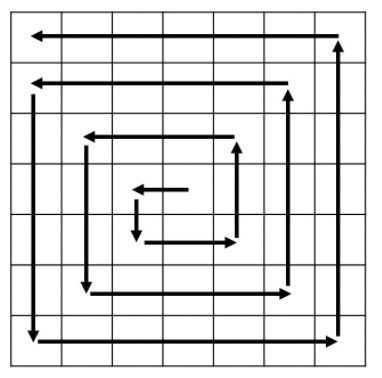

토네이도가 한칸 이동할 때마다 모래는 다음과 같이 일정한 비율로 흩날리게 된다.

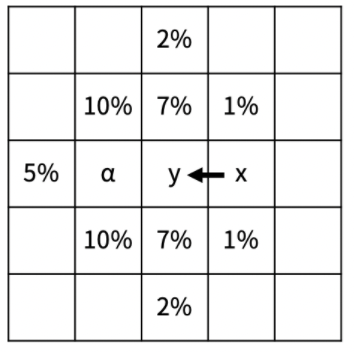

토네이도가 x에서 y로 이동하면, y의 모든 모래가 비율과 a가 적혀있는 칸으로 이동한다. 비율이 적혀있는 칸으로 이동하는 모래의 양은 y에 있는 모래의 해당 비율만큼이고, 계산에서 소수점 아래는 버린다. a로 이동하는 모래의 양은 비율이 적혀있는 칸으로 이동하지 않은 남은 모래의 양과 같다. 모래가 이미 있는 칸으로 모래가 이동하면, 모래의 양은 더해진다. 위의 그림은 토네이도가 왼쪽으로 이동할 때이고, 다른 방향으로 이동하는 경우는 위의 그림을 해당 방향으로 회전하면 된다.

토네이도는 (1,1)까지 이동한 뒤 소멸한다. 모래가 격자의 밖으로 이동할 수도 있다. 토네이도가 소멸되었을 때, 격자의 밖으로 나간 모래의 양을 구해보자.

## 입력
첫째 줄에 격자의 크기 N이 주어진다. 둘째 줄부터 N개의 줄에는 격자의 각 칸에 있는 모래가 주어진다. r번째 줄에서 c번째 주어지는 정수는 A[r][c]이다.

## 출력
격자의 밖으로 나간 모래의 양을 출력한다.

In [ ]:
n = int(input()) # 격자의 크기
board = [ list(map(int, input().split())) for _ in range(n) ]

x, y = n // 2, n // 2
dy = [-1, 0, 1, 0]
dx = [0, 1, 0, -1]
answer = 0

# 모래 날리는 비율
left = [(-2,0,0.02),(-1,0,0.07),(1,0,0.07),(2,0,0.02),(-1,1,0.01),(1,1,0.01),(-1,-1,0.1),(1,-1,0.1),(0,-2,0.05),(0,-1,0)]
right = [(x,-y,z) for x,y,z in left]
up = [(y,x,z) for x,y,z in left]
down = [(-y,x,z) for x,y,z in left]

def move (x, y, direction) :
  global answer

  result = 0
  for sx, sy, z in direction:
    nx = x + sx
    ny = y + sy

    if z == 0 :
      out = board[x][y] - result
    else :
      out = int(board[x][y] * z)
      result += out

    if 0<=nx<n and 0<=ny<n :
      board[nx][ny] += out
    else :
      answer += out

direction = 0
dict = {0: left, 1: down, 2: right, 3: up}
for size in range(1, n+1) :
  moving = 2
  if size == n :
    moving -= 1
    size -= 1
  for i in range(moving) :
    tmp = size
    while tmp > 0 :
      x = x + dx[(direction * 2) + i]
      y = y + dy[(direction * 2) + i]
      move(x,y,dict[direction*2 + i])
      tmp -= 1
  direction ^= 1

print(answer)

9
193 483 223 482 858 274 847 283 748
484 273 585 868 271 444 584 293 858
828 384 382 818 347 858 293 999 727
818 384 727 373 636 141 234 589 991
913 564 555 827 0 999 123 123 123
321 321 321 983 982 981 983 980 990
908 105 270 173 147 148 850 992 113
943 923 982 981 223 131 222 913 562
752 572 719 590 551 179 141 137 731
22961


In [ ]:
board

[[0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [8, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

# 어드벤처 게임(2310번)

## 문제
어드벤처 게임을 하던 중, 1부터 n까지의 번호가 붙은 방을 지나가야 하는 마법의 미로를 마주쳤다. 각 방 안에는 번호가 붙은 문이 있을 수 있고, 각 문은 해당하는 번호의 방으로 통한다. 방 안에는 레프리콘이나 트롤이 있을 수도 있다.

레프티콘이 있는 방에 들어가면 리프리콘은 모험가의 소지금이 일정 양 이하로 떨어지지 않게 채워준다. 레프리콘은 모험가의 소지금이 일정량 미만일 떄에는 그만한 양이 되도록 금화를 채워주고, 소지금이 일정량 이상일 때에는 그대로 둔다. 트롤이 있는 방에 들어가려면 일정량의 통행료를 지부해야 한다. 이는 맨 처음에 모험가가 1번 방에서 시작하려 할 떄에도 마찬가지이다.

모험가는 소지금이 0인 상태에서 출발한다. 과연 모험가는 1번 방에서 출발해서 n번 방에 도착할 수 있을까?

## 입력
입력은 여러 개의 미로로 주어진다. 각 미로의 첫 줄에는 미로의 방 수를 나타내는 정수 n(1<= n <= 1000)이 주어진다.

다음 n 줄에는 각 방의 정보가 주어진다. 각 방의 정보가 주어진다. 각 방의 정보는 방의 내용물을 나타내는 알파벳 하나(E: 빈방, L : 레프리콘, T : 트롤)와 그 방의 레프리콘이나 트롤이 정해놓은 금액 (빈 방일 경우 0이고, 금액은 500보다 작거나 같은 자연수), 그리고 그 방에서 다른 방으로 갈 수 있는 문의 번호들롤 이루어진다. 각 줄은 0으로 끝난다. 미로의 방 수가 0개인 입력이 들어오면 입력을 종료한다.

## 출력
출력은 각 미로마다 한 줄씩으로 이루어진다. 각 줄에는 1번 방에서 n번 방까지 갈 수 있는지를 "Yes" 또는 "No"로 출력한다.


In [ ]:
answer = []
arrive = False

def dfs (start, money, visited) :
  global arrive
  room = maps[start]

  if room[0] == 'T' and room[1] > money :
    return
  elif room[0] == 'T' :
    money -= room[1]
  elif room[0] == 'L' and room[1] > money :
    money = room[1]

  if start == n : # n번방 도착
    arrive = True
    return

  visited[start] = True
  for num in room[2] : # 인접 방
    if not visited[num]:
      dfs(num, money, visited)
  visited[start] = False

while True :
  n = int(input())

  if n == 0 : break

  maps = [0] # 연결관계
  for _ in range(1, n+1) : # 연결관계 추가
    room = input().split()
    maps.append((room[0], int(room[1]), list(map(int, room[2:-1]))))

  # 깊이우선탐색으로 해결 -> 도착한 방이 n번 방이면 "Yes" 출력 후 continue
  visited = [False] * (n+1)
  dfs(1, 0, visited)

  if arrive : answer.append('Yes')
  else : answer.append('No')
  arrive = False

print('\n'.join(answer))

3
E 0 2 0
L 10 3 0
T 15 1 2 0
4
E 0 2 3 0
L 201 2 3 0
L 10 4 0
T 15 2 3 1 0
0
No
Yes


# Relocation(5901번)

## 문제
Farmer john is moving! He is trying to find the best place to build a new farm so as to minimize the amount of travle he needs to do each day.

The region to which Fj plans to move has N towns (1<=N<=10,000). There are M bi-directional roads(1<=M<-50,000) connection certain pairs of towns. All towns are reachable from each-other via some combination of roads. FJ needs your help selecting the best town as the home for his new farm.

There are markets in K of the towns(1<=K<=5) that FH wants to visti every day. In particular, every day he plans to leave his new farm, visit the K towns with markets, and then return to his farm. FJ can visit the markets in any order he wishes. When selecting a town in which build his new farm, FJ wants to choose only from the N-K towns that do not have markets, since housing prices are lower in those towns.

Please help FJ compute the minimum distance he will need to travel during his daily schedule, if he builds his farm in an optimal location and chooses his travel schedule to the markets as smartly as possible.

## 입력
- Line 1 : Three space-separated integers, n,m and k
- Line 2..1+K : Line i+1 contains an integer in the range 1..N indentifying the town containing the ith market. Each market is in a differecnt town.
- Line 2+K..1+K+M : Each line contains 3 space-separated integers, i,j(1<=i,j<=n), and L(1<=L<=1000), indicating the presence of a road length L from town i to town j.

## 출력
- Line 1 : The minimum distance FJ needs to travel during this daily routine, if he builds his farm in an optimal location.